# AMATH 585
### HW 4
### Shabab Ahmed 

#### Problem 1: 
a) Adapt the code from the $\texttt{ChebyshevSpectral.ipynb}$ notebook to reproduce these
figures. Use the max-norm of the error, approximated by evaluating the interpolating polynomial at
1000 points and comparing to the original function at these points.

-----

#### Solution: 
We adapt the code from the $\texttt{ChebyshevSpectral.ipynb}$ notebook. In particular, we use the `poly_interp_chebyshev` function below that sets up a Vandermonde matrix using the Chebyshev basis and then solves for the coefficients c. We will then evaluate the resulting polynomial on a fine grid of points and estimate the error using the `error_chebyshev` function. This function returns the maximum norm of the error of the Chebyshev interpolation. 

Once we have computed the coefficients, we need to be able to evaluate:
$$ 
p(x) = c_0T_0(x) + \dots c_NT_N(x)   
$$

We use the `T_sum` function to evaluate the polynomial at an arbitrary set of points. In order to do so, we set up a matrix $B$ with $j$ th column $T_j(x)$ and then multiply $Bc$ where $c$ are the coefficients.  

We also use the function `T` to evaluate the Chebyshev polynimal $T_k(x)$ for any order $k$ at a set of points $x$.

Combining these functions allows us to reproduce the figures in the homework. 


In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
def T(n,x):
    """
    Evaluate Chebyshev polynomial T_n(x) using 3-term recurrence relation.
    Assumes x is a numpy array of values.
    Does not work as written if x is just a single value!
    """
    # Initialize Tnm = 1 and Tn = x and then iterate
    Tnm = ones(x.shape)  # will be used for T_{n-1} in loop
    if n==0:
        return Tnm       # special case T_0 = 1 forall x
    Tn = x               # will be used for T_n in loop
    
    for k in range(2,n+1):
        Tnp = 2*x*Tn - Tnm
        Tnm = Tn.copy()
        Tn = Tnp.copy()
    return Tn

def T_sum(c,x):
    N = len(c) - 1
    B = empty((len(x),N+1))
    for k in range(N+1):
        B[:,k] = T(k,x)
    Tsum = dot(B,c)
    return Tsum

def poly_interp_chebyshev(u_fcn, x):
    """
    Peform polynomial interpolation of the function u_fcn at points x using the Chebyshev basis.
    """
    # Vandermonde matrix using monomial basis:
    N = len(x) - 1
    B = empty((N+1,N+1), dtype=float)  # initialize storage for B
    for k in range(N+1):
        B[:,k] = T(k,x)
    
    # Solve for polynomial coefficients:
    u = u_fcn(x)
    c = solve(B,u)
    return c

def error_chebyshev(u_fcn, x, c):
    """
    Returns the maximum norm of the error of the Chebyshev interpolation 
    """
    xfine = linspace(-1,1,1000)
    ufine = u_fcn(xfine)
    
    # Evaluate p(xfine) using T_sum:
    p = T_sum(c,xfine)

    max_error = abs(p-ufine).max()
    return max_error

In the following piece of code, we use the Runge function $u(x) = \frac{1}{1+16x^2}$. We test the code above for different $N$ and use it to compute the maximum norm of the error of the Chebyshev interpolation for the different $N$s, that is, we compute the maximum difference between the original function and the polynomial interpolant evaluated on a grid. We then produce a log-log plot of the error as a function of $N$ versus $N$ and also a semilogy plot. We observe that there are exactly the same plots provided in the homework. We see exponential convergence. 

Text(0.5, 1.0, 'semilogy plot of errors')

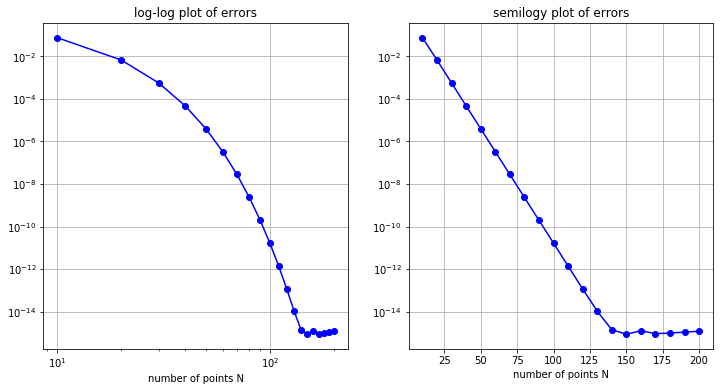

In [4]:
u_fcn = lambda x: 1 / (1 + 16*x**2)
N_points = linspace(10,200,20) # Number of points 
error = [] # Initiliazing vector of errors
for i in range(len(N_points)):
    N = N_points[i]
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    max_error = error_chebyshev(u_fcn, x, c) # Max norm of error of interporlation for particular N
    error.append(max_error)

figure(figsize=(12,6))
subplot(121)
loglog(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('log-log plot of errors')

subplot(122)
semilogy(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')


-----
b) Change to this variant of the Runge function: $u(x) = \frac{1}{1 + 25x^2}$, which is also commonly used.
This function has poles at ±0.2i in the complex plane, closer to the real axis than the previous function.
As a result the convernence is not quite as fast, though still exponential. Make these plots.


-----
#### Solution: 
We carry out the same process as above and use the same pieces of code. We simply change our function to be $u(x) =\frac{1}{1+25x^2}$ from $u(x) = \frac{1}{1+16x^2}$. We get the following plots: 

Text(0.5, 1.0, 'semilogy plot of errors')

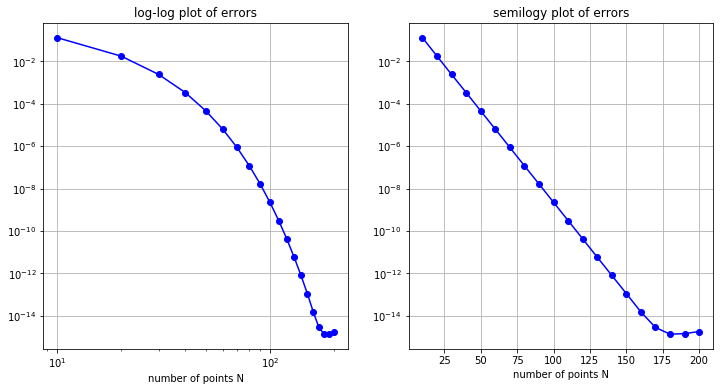

In [5]:
u_fcn = lambda x: 1 / (1 + 25*x**2)
N_points = linspace(10,200,20) # Number of points 
error = [] # Initiliazing vector of errors
for i in range(len(N_points)):
    N = N_points[i]
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    max_error = error_chebyshev(u_fcn, x, c) # Max norm of error of interporlation for particular N
    error.append(max_error)

figure(figsize=(12,6))
subplot(121)
loglog(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('log-log plot of errors')

subplot(122)
semilogy(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')

We can clearly see that it takes longer to converge in this case. In the previous case, convergence occured before using 150 points but in this case we see that it takes more than 150 points for the error to drop further. As mentioned above, this is due to the fact that the function has poles closer to the real axis than the previous function. 

-----
c) If the function is analytic in the entire complex plane then convergence is even faster than exponential, meaning the slope continues to decrease even in a semilogy plot.
Illustrate this for $u(x) = (x − 0.5) \sin(10x)$, using smaller values of $N$ since convergence is so fast!

-----
#### Solution: 

Again, we use the same pieces of code as we have used previously with two changes. First, we change the function to be $u(x) = (x-0.5)\sin(10x)$. We also use smaller values of $N$. Previously, we considered $N \in [10, 20, 30,\dots , 200]$ but for this instance we consider $N \in [10,12, 14, 16,\dots, 50]$ to observe convergence. As we can observe in the plots, testing for these number of points is sufficient as we can observe convergence extremely quickly and 35 points seems to be enough. This makes sense because the function is analytic in the entire complex plane. We can also observe that the slope continues to decrease even in the semilogy plot. The plots are attached after the following piece of code:

Text(0.5, 1.0, 'semilogy plot of errors')

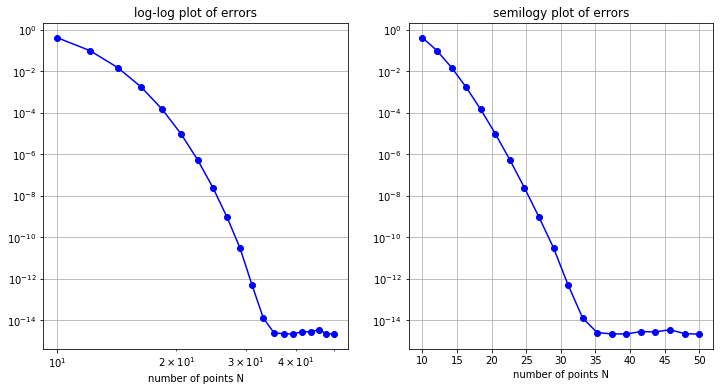

In [6]:
u_fcn = lambda x:(x-0.5)*sin(10*x)
N_points = linspace(10,50,20) # Number of points 
error = [] # Initiliazing vector of errors
for i in range(len(N_points)):
    N = N_points[i]
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    max_error = error_chebyshev(u_fcn, x, c) # Max norm of error of interporlation for particular N
    error.append(max_error)

figure(figsize=(12,6))
subplot(121)
loglog(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('log-log plot of errors')

subplot(122)
semilogy(N_points, error, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')

-----

#### Problem 2:

a)The notebook $\texttt{ChebyshevSpectral.ipynb}$ illustrates how to approximate $u'(x)$ by doing
Chebyshev polynomial interpolation to get $p(x)$ and then computing $p'(x)$. Extend this to give an approximation to $u''(x)$ by computing $p''(x)$. You will have to write a function to compute $T''_n(x)$ for
each basis function $T_n(x)$, similar to what was done for $T'_n(x)$.

Test this out by computing the second derivative of these functions, and also produce semilogy plots of
the errors as $N$ is increased:

• $u(x) = sin(2x)$,

• $u(x) = (x − 0.5) sin(10x)$,

• $u(x) = \frac{1}{1 + 16x^2}$

Comment on any interesting behavior you observe.

-----
#### Solution: 

From the $\texttt{ChebyshevSpectral.ipynb}$ notebook we have a function that evaluates the derivative $T_n'(x)$. It uses a 3-term recurrence derived from that of the $T_n$ by differentiating:
$$
T'_{n+1}(x) = 2T_n(x) + 2xT_n'(x) - T_{n-1}'(x)
$$
with starting values:
$$
T_0'(x) = 0, \quad T_1'(x) = 1.
$$.

We do the same thing to create a function that evalues $T_n''(x)$. We differentiate the 3-term recurrence relation of $T_n'(x)$ found above: 

$$
T''_{n+1}(x) = 2T'_n(x) + 2T'_n(x) + 2xT''_n(x) - T''_{n-1}(x)\\
$$
$$
T''_{n+1}(x) = 4T'_n(x) + 2xT''_n(x) - T''_{n-1}(x)
$$

with starting values:

$$ T''_0(x) = 0, \quad T''_1(x) = 0.$$ We would also need $T'_1(x) = 1$.

The following code is similar to the code used for evaluating $T_n'(x)$. In this case, we add the new recurrence relation for the second derivative and the new starting values. We also add two new update commands to update the $T''_{n}(x)$, $T''_{n-1}(x)$ values along with $T'_{n}(x)$, $T'_{n-1}(x)$, $T_{n}(x)$ and $T''_{n-1}(x)$ values. 

In [7]:
def Txx(n,x):
    """
    Evaluate the second derivative of Chebyshev polynomial T_n(x) using 3-term recurrence relation
    Assumes x is a numpy array of points.
    """
    Tnm = ones(x.shape)  # will be used for T_{n-1} in loop
    Txnm = zeros(x.shape)  # 1st derivative 
    Txxnm = zeros(x.shape) # 2nd derivative
    if n==0:
        return Txxnm       # special case T_0 = 1 for all x
    Tn = x               # will be used for T_n in loop
    Txn = ones(x.shape) # 1st derivative
    Txxn = zeros(x.shape) # 2nd derivative 
    
    for k in range(2,n+1):
        Tnp = 2*x*Tn - Tnm # T_{n+1}
        Txnp = 2*Tn + 2*x*Txn - Txnm # T'_{n+1}
        Txxnp = 4*Txn + 2*x*Txxn - Txxnm # T''_{n+1}
        Tnm = Tn.copy()  # updating T_{n-1}
        Tn = Tnp.copy()  # updating T_{n}
        Txnm = Txn.copy() # updating T'_{n-1}
        Txn = Txnp.copy() # updating T'_{n}
        Txxnm = Txxn.copy() # updating T''_{n-1}
        Txxn = Txxnp.copy() # updating  T''_{n}
    return Txxn

We test the routine on a few functions. The first function we test it on is $u(x) = \sin(2x)$ and so $u''(x) = -4 \cos(2x)$. We test the code for a particular number of points $N$ and then we extend this to produce a semilogy plot of the errors as $N$ is increased. We use the maximum norm of the error to produce the semilogy plot as we evaluate both the actual second derivative and the interpolated derivative on a grid. We can see that the second derivative of the interpolation matches with the actual second derivative really well even for a small value of $N$. The second derivative of the interpolant seems to lie on top of the actual second derivative so the covergence seems to happen pretty quickly. 

Max absolute error in second derivative = 9.65241e-11


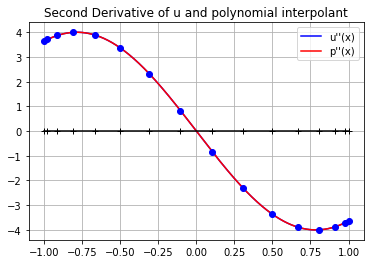

In [8]:
# For a particular number of points (N = 15)

u_fcn = lambda x: sin(2*x)         # test function
ux_fcn = lambda x: 2*cos(2*x)
uxx_fcn = lambda x: -4*sin(2*x)    # second derivative of test function
N = 15
x = cos(linspace(0, pi, N+1))
c = poly_interp_chebyshev(u_fcn, x)

xfine = linspace(-1,1,1000)
B = empty((len(xfine),N+1))

# evaluate sum c_n * Txx_n(x) at xfine points:

for k in range(N+1):
    B[:,k] = Txx(k,xfine)
pfine = dot(B,c)

# true u''(x) at xfine points:
uxx_fine = uxx_fcn(xfine)

plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in second derivative = %g' % abs(pfine-uxx_fine).max());


The following piece of code produces a semilogy plot. The semilogy plot shows us what we seemed to predict in the previous plot. The convergence occurs really quickly and $N=15$ seems to be sufficient. We see exponential convergence as this is a semilogy plot. We can also see that the round off error takes over after $N=18$ or so. The slope of the plot gives us the decay rate. However, the slope of the plot is not the same throughout. Further, we can see that the behaviour for odd and even $N$ are slightly different. The error seems to decrease more when we move from an even $N$ to an odd $N$. The error still decreases when we move from odd $N$ to even $N$ but the slope of the plot is less steep in such cases. This behaviour is repeated until rounding error takes over. To comment further on the behavior of the error as $N$ increases we will zoom in on a smaller range of $N$ and plot the semilogy plot. 

Text(0.5, 1.0, 'semilogy plot of errors')

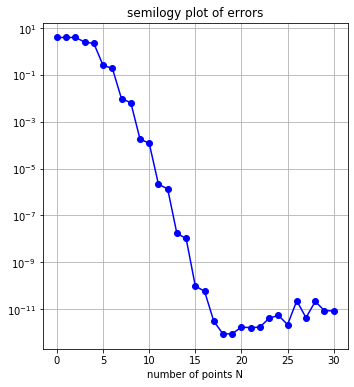

In [9]:
# Producing a semilogy plot as N increases 

N_points = linspace(0,30, 31) # Number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # Max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)

# semilogy plot of max error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')



We want to to look at the semilogy plot of errors for all values of $N$ over some range including both even and odd values of $N$. We look at $N \in [5,15]$ and observe the behavior of the plot. We observe the same step like behavior that we mentioned for the previous plot but in this case we are zoomed in. At odd $N$, the error seems to decrease more as indicated by the steeper slope of the plot. 

Text(0.5, 1.0, 'semilogy plot of errors')

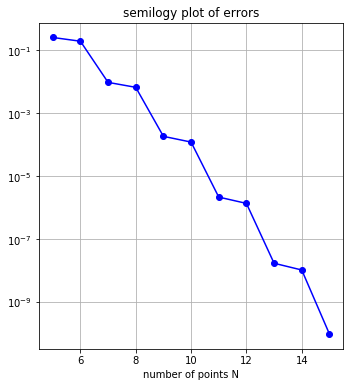

In [10]:
N_points = linspace(5,15, 11) # Number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # Max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)


# semilogy plot of max error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')

-----
Now, we test the routine on $u(x)=(x-0.5)\sin(10x)$ 
and so $u''(x) = 20\cos(10x)+(50-100x)\sin(10x)$. We perform the same analysis as above. 

Max absolute error in second derivative = 4.00846e-10


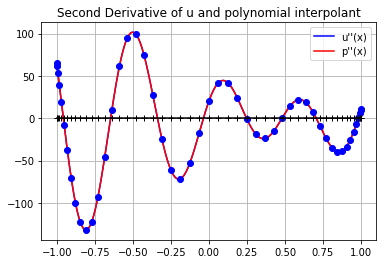

In [11]:
# For a particular number of points (N = 50)

u_fcn = lambda x: (x-0.5)*sin(10*x)
ux_fcn = lambda x: sin(10*x)+(10*x-5)*cos(10*x)
uxx_fcn = lambda x: 20*cos(10*x)+(50-100*x)*sin(10*x)

N = 50
x = cos(linspace(0, pi, N+1))
c = poly_interp_chebyshev(u_fcn, x)

xfine = linspace(-1,1,1000)
B = empty((len(xfine),N+1))

# evaluate sum c_n * Txx_n(x) at xfine points:

for k in range(N+1):
    B[:,k] = Txx(k,xfine)
pfine = dot(B,c)

# true u''(x) at xfine points:
uxx_fine = uxx_fcn(xfine)

plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in second derivative = %g' % abs(pfine-uxx_fine).max());


We seem to get a good approximation again in this case. The second derivative approximation seems to match up really well with the actual second derivative. The maximum error for $N =50$ seems to be about $10^{-10}$. We should expect convergence but not as quickly as in the previous example.  Now, we produce a semilogy plot of the maximum norm of the error.We observe that the best we can achieve is an error of $10^{-10}$ before rounding error takes over. However, we again observe this step like behavior we saw in the last example. The log of the error decreases with $N$ but the rate of decay is not constant. The slop changes even within the semilogy plot. The change in slope is greater when we move even $N$ to odd $N$ just like we saw in the previous example. 

Text(0.5, 1.0, 'semilogy plot of errors')

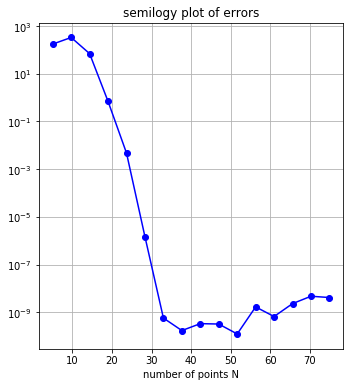

In [12]:
# Producing a semilogy plot as N increases 

N_points = linspace(5,75,16) # Number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # Max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)

# semilogy plot of max error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')



We zoom in on the semilogy plot to observe the behavior described above more closely. We plot the log of the error as $N$ varies in the interval $[25,35]$. The step behavior can be seen clearly. The log of the error decreases more at even $N$ compared to odd $N$ as can be seen by the steepness of the slope. This is different in the sense that error decreases more for even  $N$ but the phenomenon remains the same. 

Text(0.5, 1.0, 'semilogy plot of errors')

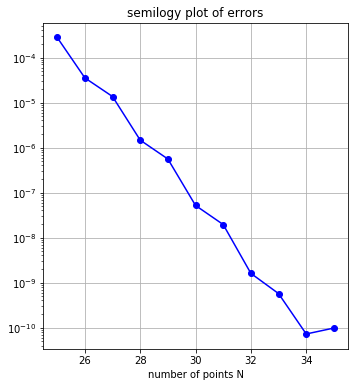

In [13]:
N_points = linspace(25,35, 11) # Number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # Max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)


# semilogy plot of max error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')

-----
Finally, we test the routine on $u(x) = \frac{1}{1+16x^2}$. Then, $u''(x) = \frac{32(48x^2-1)}{(16x^2+1)^3}$. We perform the same analysis as above. For this function, we witness that for $N=21$ we do not get as nice of an approximation as we did previously. In the previous examples, we saw convergence with $N=15$ points. We see a lot of oscillation near the ends and it does not really match the actual second derivative. The approximation is nearly not as smooth as the actual second derivative and the maximum error seems to be occuring at the boundary points. We decide to investigate this further by plotting it for $N=22$. We see that the maximum norm of the error actually increases and the oscillations at the end are happening with greater amplitude. The boundary values are differing by a greater marging for this even $N$ and we expect this trend given what we have seen in the previous examples. Another interesting note is that for odd $N$ the approximation was greater at the boundary points but for even $N$ the approximation is actually lower at the boundary points. 

Max absolute error in second derivative = 7.70835
Max absolute error in second derivative = 27.8835


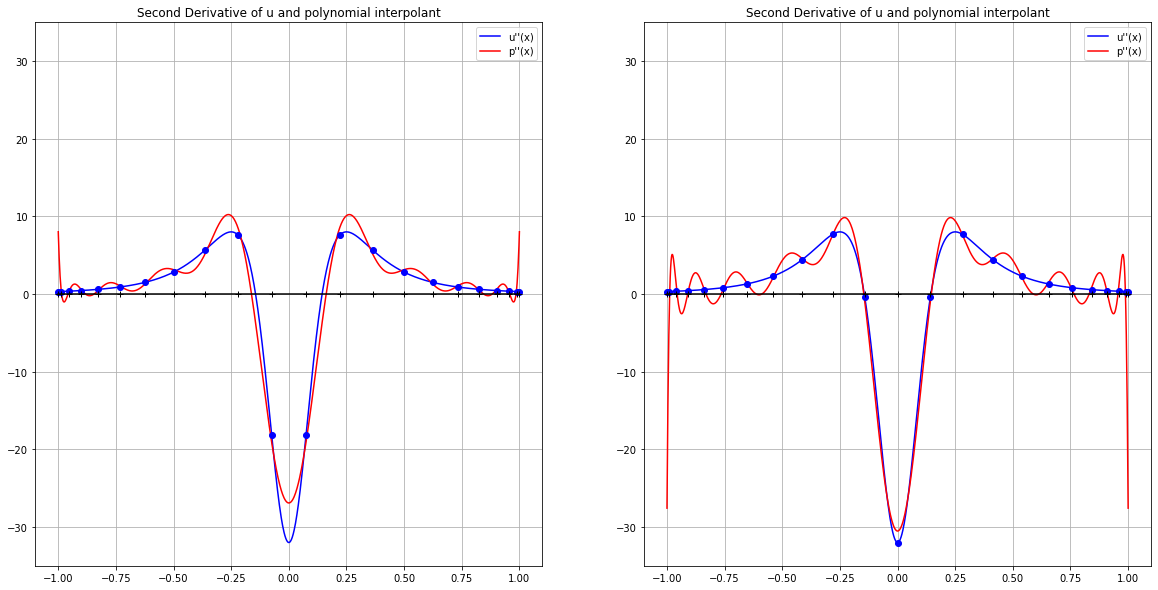

In [14]:
# For a particular number of points (N = 21)

u_fcn = lambda x: 1/(1+16*x**2)                          # test function
ux_fcn = lambda x: (-32*x)/(16*x^2+1)**2
uxx_fcn = lambda x: (32*(48*x**2-1))/((16*x**2+1)**3) # second derivative of test function
N = 21
x = cos(linspace(0, pi, N+1))
c = poly_interp_chebyshev(u_fcn, x)

xfine = linspace(-1,1,1000)
B = empty((len(xfine),N+1))

# evaluate sum c_n * Txx_n(x) at xfine points:

for k in range(N+1):
    B[:,k] = Txx(k,xfine)
pfine = dot(B,c)

# true u''(x) at xfine points:
uxx_fine = uxx_fcn(xfine)


figure(figsize=(20,10))
subplot(121)
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
ylim(-35,35)
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in second derivative = %g' % abs(pfine-uxx_fine).max());

N=22
x = cos(linspace(0, pi, N+1))
c = poly_interp_chebyshev(u_fcn, x)

xfine = linspace(-1,1,1000)
B = empty((len(xfine),N+1))

# evaluate sum c_n * Txx_n(x) at xfine points:

for k in range(N+1):
    B[:,k] = Txx(k,xfine)
pfine = dot(B,c)

# true u''(x) at xfine points:
uxx_fine = uxx_fcn(xfine)

subplot(122)
plot(xfine, uxx_fine, 'b', label="u''(x)")
plot(xfine, pfine, 'r', label="p''(x)")
plot(x, uxx_fcn(x), 'bo')
plot(x, zeros(x.shape), 'k-+')
grid(True)
legend()
ylim(-35,35)
title('Second Derivative of u and polynomial interpolant')
print('Max absolute error in second derivative = %g' % abs(pfine-uxx_fine).max());

We produce a semilogy plot of the error as $N$ increases. We have seen above that we should not expect convergence soon and that is why we consider larger values of $N$. We can see decay happening as the semilogy plot has a negative slope. We seem to be getting the best approximation for about $N=150$ after which rounding error takes over. The error for the best approximation seems to be around $10^{-9}$. For further investigation of behavior at odd or even $N$, we zoom in on the semilogy plot like we did previously. 

Text(0.5, 1.0, 'semilogy plot of errors')

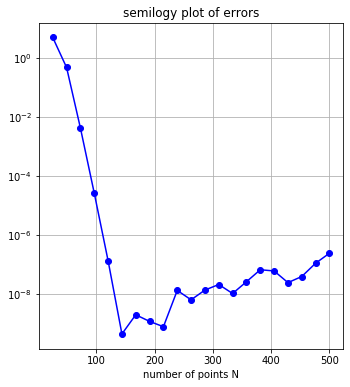

In [15]:
# Producing a semilogy plot as N increases 

N_points = linspace(25,500,21) # number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)

# semilogy plot of max error

figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')



The following piece of code produces the semilogy plot for all $N$ in the interal $[20,70]$ so we can observe the differeces in error for odd or even $N$. We can again see that the error is decreasing further when we move from even $N$ to odd $N$. However, when we move from odd $N$ to even $N$ we actually see an increase in error in this example. We see a step like behavior but in this case every other step is going in the opposite direction. This plot makes sense given our plots of the second derivatives. We saw that for even $N$ the oscillations at the end were happening with greater amplitude and so the error at the boundary for even $N$ was greater. This is exactly what we see in the semilogy plot. 

Text(0.5, 1.0, 'semilogy plot of errors')

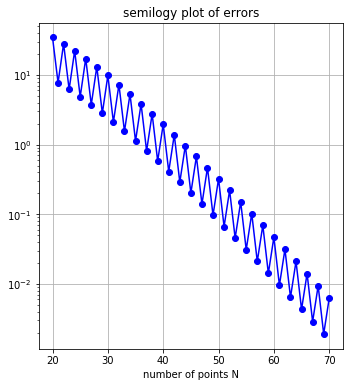

In [16]:
N_points = linspace(20,70, 51) # Number of points to consider
errors_xx = []
for i in range(len(N_points)):
    N = int(N_points[i])
    x= cos(linspace(0, pi,N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    
    pfine = dot(B,c)
    maxerror_xx = abs(pfine-uxx_fine).max() # Max norm of error of interporlation for particular N
    errors_xx.append(maxerror_xx)


# semilogy plot of max error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, errors_xx, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')


The interesting thing we observed was that the semilogy plot had a step like phenomenon as we moved from odd to even $N$ and vice versa. This indicates that error of the approximation depends on whether we have odd $N$ or even $N$. In our examples we found that odd $N$ seems to do a better job in approximating. This is made even clearer in the last example as we can observe the difference in the plots of the second derivatives themselves. In this example, the error actually increases for even $N$. This is precisely due to oscillations happening at the boundaries and the oscillations for the even $N$ is happening at a greater amplitude giving us greater error than odd $N$. This is not really a surprise as we should see this in Problem 1 too. This happens for Chebyshev interpolation in general as we witnessed in class too. We see the phenomenon being carried over to second derivative approximations too. 

-----
#### Problem 3:

Now write a routine to solve the Boundary value problem 

$$
u''(x) = f(x), \quad -1 \leq x \leq 1, 
$$

with Dirichlet boundary conditions $u(-1) = \alpha$, $u(1) = \beta$, using spectral collocation at the Chebyshev points. 

Test it out at least on the case where the true solution is $u(x) = \sin(2x)$ (which defines $f(x)$ and the boundary values) and produce a semilogy plot of the errors.




-----
#### Solution:

We need to set up and solve a linear system of equations for the coefficients $c_n$ in the polynomial

$$
p(x) = \sum_{n=0}^{N}c_nT_n(x)
$$.

The equations in the system include the boundary conditions , 

$$
\sum_{n=0}^{N}c_nT_n(-1) = \alpha, \quad \sum_{n=0}^{N}c_nT_n(1) = \beta
$$

If we approximate $u(x)$ by $U(x)$ we get that $U''(x_j) = \sum_{n=1}^{N-1}c_nT''_n(x_j) = f(x_j)$. This gives us the following linear system :

$$
AC = f
$$

where 

$$
f= \begin{bmatrix}
\beta\\
f(x_1)\\
\vdots\\
f(x_{N-1})\\
\alpha
\end{bmatrix}
$$. 


The right hand side looks like this because $x_j$ is ordered from right to left. 

Also: 

$$
A_{j,n} = T_n(x_j)
$$

for $j = 1,2,\dots, N-1$. 

The boundary conditions gives us that $A_{0n} = T_n(1)$ and $A_{Nn} = T_n(-1)$. 

Therefore: 

$$
A = \begin{bmatrix}
T_0(1) & T_1(1) & T_2(1)& \dots &T_N(1)\\
T''_0(x_1) & T''_1(x_1) & T''_2(x_1) & \dots & T_N(x_1)\\
T''_0(x_2) & T''_1(x_2) & T''_2(x_2) & \dots & T_N(x_2)\\
\dots & \dots \\
T''_0(x_{N-1}) & T''_1(x_{N-1}) & T''_2(x_{N-1}) & \dots & T_N(x_{N-1})\\
T_0(-1) & T_1(-1) & T_2(-1)& \dots &T_N(-1)
\end{bmatrix}
$$

The following piece of code constructs this matrix $A$ and the right hand side $f$ and uses `solve` command to solve the linear system for the coefficients $c$.

In [17]:
def solve_bvpc(f, alpha, beta, N):
    """
    Solve the BVP with Dirichlet BCs using spectral collocation
    Input:
        f is a function defining the right hand side,
        alpha defines the Dirichlet boundary condition u(-1) = alpha,
        beta defines the Dirichlet boundary condition u(1) = beta,
        N is the number of Chebyshev points to use
    
    Returns: 
    
        the coefficients c to be used in evaluating the solution in the Chebyshev basis
    
    """
    
    x = cos(linspace(0, pi,N+1))   # note x[0]=1, x[N+1]=bx
    A = empty((N+1,N+1), dtype=float)  # initialize storage for A
    
    # set up matrix A
    
    # interior rows (we will deal with the first and last row later)
    
    for n in range(N+1):
        A[:,n] = Txx(n,x)       #A_{ij} = T''_{j}(x_i)

    
    x0 = ones(x.shape)
    xm = -1*x0
    for k in range(N+1):
        A[0,k]= T(k,x0)[1]     #A_{0n} = T_n(1)
    
    for k in range(N+1):
        A[N, k] = T(k, xm)[1]  #A_{Nn} = T_n(-1)
        
    
 
    

    
    # right hand side:
    b = f(x)
    
    # update b to include the boundary conditions 
    b[0] = beta
    b[N] = alpha


    c= solve(A,b)
    
    return c

We test the routine on the function $u(x) = \sin(2x)$. Since, $u''(x) = -4\sin(2x)$ we know that this has to be $f(x)$. Similarly, the Dirichlet boundary conditions are the following: 

$$
u(-1) = \alpha = \sin(-2) = -0.909
$$
$$
u(1) = \beta = \sin(2) = 0.909
$$

We get the coefficients `c`from our previous routine and use `T_sum` to evaluate the solution found in the Chebyshev basis on a grid. We compare this with the true solution on the same grid. In this particular step, we use a particular value of $N = 15$. The computed solution matches extremely well with the true solution and in fact lies on top of it even for this small value of $N$. We expect to see exponential convergence and we test the theory by producing a semilogy plot. 

Max absolute error in solution = 1.4877e-14


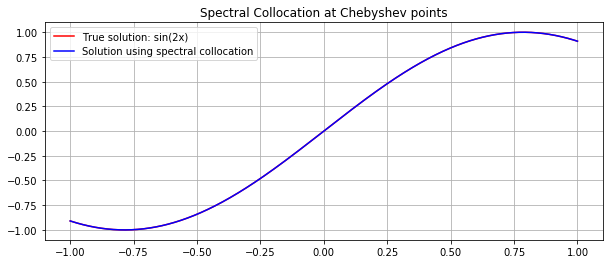

In [18]:
u_fcn = lambda x: sin(2*x)
uxx_fcn = lambda x: -4*sin(2*x)
alpha = u_fcn(-1)
beta = u_fcn(1)
N = 15
c = solve_bvpc(uxx_fcn, alpha, beta, N)

xfine = linspace(-1,1,1000)
ufine = u_fcn(xfine)
p = T_sum(c, xfine)

figure(figsize=(10,4))
plot(xfine, ufine, 'r', label = 'True solution: sin(2x)')
plot(xfine, p, 'b', label = 'Solution using spectral collocation')
legend()
grid(True)
title('Spectral Collocation at Chebyshev points')
print('Max absolute error in solution = %g' % abs(p-ufine).max());

In what follows we complete the same process as above but for a number of different $N$ values. We do this in order to help us produce a semilogy plot of the maximum norm of the error. Again, we use the maximum norm because we have a vector of differences between the computed solution and actual solution since they are both evaluated on a grid. The semilogy plot shows us that the error is decreasing as $N$ increases and we get exponential convergence even for $N$ as small as 18. We want to observe the behavior for odd and even $N$. To see this more clearly we zoom in on the plot by looking at every integer value of $N$ on the interval $[5, 15]$. The plot makes it clear that the error decreases more with odd $N$ compared to even $N$ as indicated by the steeper slope. Again, this is not surprising because we have used our second derivative approximation to produce the $A$ matrix. We saw this behavior in the second derivative approximation and since we are using the same function it makes sense that we see the behavior here too. 

Text(0.5, 1.0, 'semilogy plot of errors')

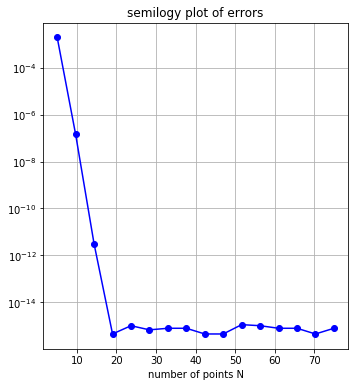

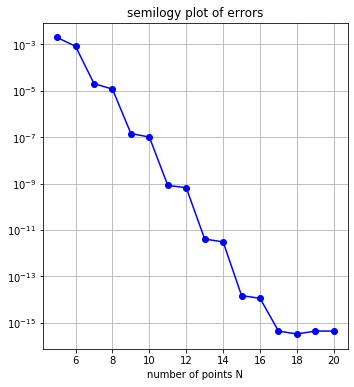

In [19]:
N_points = linspace(5,75,16) # number of points to consider
err = []
u_fcn = lambda x: sin(2*x)
for i in range(len(N_points)):
    N = int(N_points[i])
    c = solve_bvpc(uxx_fcn, alpha, beta, N)
    xfine = linspace(-1,1,1000)
    ufine = u_fcn(xfine)
    p = T_sum(c, xfine)
    maxerr = abs(p-ufine).max()
    err.append(maxerr)


# semilogy plot of error
figure(figsize=(12,6))
subplot(121)
semilogy(N_points, err, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')


N_points = linspace(5, 20, 16)# number of points to consider
err = []

for i in range(len(N_points)):
    N = int(N_points[i])
    c = solve_bvpc(uxx_fcn, alpha, beta, N)
    xfine = linspace(-1,1,1000)
    ufine = u_fcn(xfine)
    p = T_sum(c, xfine)
    maxerr = abs(p-ufine).max()
    err.append(maxerr)

# semilogy plot of error
figure(figsize=(12,6))
subplot(122)
semilogy(N_points, err, 'bo-')
grid(True)
xlabel('number of points N')
title('semilogy plot of errors')

